In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df_reviews = pd.read_csv('cleared-masters-reviews.csv', index_col=0)

In [6]:
df_reviews.head(10)

,label,text
0,нет категории,почаще улыбаться)))
1,много данных,Не зачем Вам мой паспорт
2,нет категории,Тест
3,нет категории,yjhbfg
4,нет категории,",,,"
5,нет категории,не могу каректно определить я первыраз тут
6,нет категории,!!!!!!!!!!!!!!!!!!!
7,нет категории,В первый раз дали не правильный договор. Из-за...
8,нет категории,s
9,нет категории,1


In [7]:
df_reviews.shape

(9000, 2)

In [8]:
df_reviews.describe(include='all')

,label,text
count,9000,9000
unique,15,6899
top,ок,5
freq,4627,95


In [9]:
df_reviews.label.unique()

array(['нет категории', 'много данных', 'были проблемы', 'акции и скидки',
       'непонятно', 'интерфейс', 'ок', 'донастройка', 'цена',
       'иностранный телефон', 'навязывание услуг', 'оплата', 'поддержка',
       'профили', 'SSL'], dtype=object)

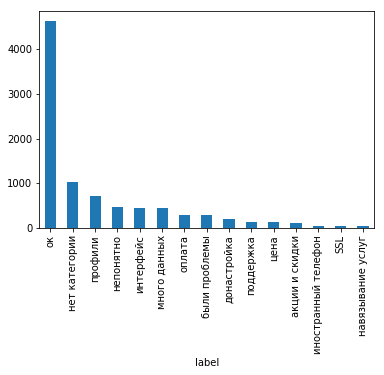

In [10]:
df_reviews.groupby('label').text.count().sort_values(ascending=False).plot.bar()

In [11]:
df_reviews.groupby('label').text.count().sort_values(ascending=False)

label
ок                     4627
нет категории          1037
профили                 707
непонятно               471
интерфейс               458
много данных            454
оплата                  285
были проблемы           281
донастройка             200
поддержка               132
цена                    125
акции и скидки          108
иностранный телефон      40
SSL                      38
навязывание услуг        37
Name: text, dtype: int64

Явный перевес категории "ок" над всеми остальными. "иностранный телефон", "SSL", "навязывание услуг" - очень мало сообщений из этих категорий. Скорее всего, точность классификации этих категорий будет низкой. Возможно имеет смысл объединить их в одну категорию "остальное"?

In [12]:
pd.options.display.max_rows = 75
pd.options.display.max_colwidth = 200

df_reviews.sort_values(by='label').groupby('label').head(5)

,label,text
8998,SSL,"Возможность выбора другого способа подтверждения домена, например, по почте admin@domain.ru"
6912,SSL,"Не работает в Safari\nГенерить мне csr, и только потом есть выбор - загрузить свой.\nнет проверки по емейлу, только днс запись"
6911,SSL,"1. зачем доп. операции через почту , когда заказ сертификата делается через панель хостинга?\n2. не трогал письмо с почты, только перешел по ссылке https://order.reg.ru/services-setup/instruction-..."
6910,SSL,Когда запрашивать сертификат с сервера?
6909,SSL,"Заказ простой, но установка сертификатов требует многих манипуляций. Хотелось бы, чтобы после оплаты сертификата он устанавливался автоматически"
790,акции и скидки,"В почте была ссылка на бесплатный хостинг, но при ее вводе, сумма не изменилась. Спасибо"
798,акции и скидки,"Получилось купить домены с 7ого раза. Долго мучался с регистрацией данных. \nТакже судя по вашим окошкам и бонусам, был уверен , что хостинг на 2 месяца в подарок, но его так и не получил и пришл..."
797,акции и скидки,почему бесплатный домен обещанный не добавляется ?
796,акции и скидки,По промокоду REGRU-PIKABU должен был быть сертификат и хостинг в подарок. Не понятно как получить сертификат
795,акции и скидки,"Я использовал промокод из письма «Прошло ровно 7 дней 7 часов и 7 минут с того момента, как вы стали клиентом REG.RU!» и при получении было непонятно сколько этот промокод будет действовать."


**Оплата** и **цена** кажется смешаны:
- Не понятно, почему нельзя было оплатить за пол года.. - цена
- в корзине перед тем как перейти к оплате указывать конечную сумму со скидкой - цена
- нормально, только процедуру оплату надо упростить - оплата
- Предупреждайте о снятии денег с карты, пожалуйста. - оплата

"Я бы хотел видеть в описании моей персоны какие домены уже к ней привязаны." - **нет категории**, хотя по смыслу **профили**.
"Неочевидно было добавление профиля пользователя, его персональных данных ." - **много данных**, тоже скорее **профили**.

Где-то допущены явные ошибки классификации, где-то выбор категории просто спорный. Возможно стоит разметить данные заново. Другой вариант - объединить сообщения в меньшее количество категорий, например: **ок**, **проблема**, **нет категории**.

In [13]:
# Приведем все отзывы к нижнему регистру и избавимся от знаков препинания
df_reviews.text = df_reviews.text.str.lower().str.replace('[^\w\s]','').str.strip()

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.pipeline import Pipeline
from stop_words import get_stop_words
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
from textvec import vectorizers

In [15]:
le = LabelEncoder()
X = df_reviews.text
y = le.fit_transform(df_reviews.label)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y, shuffle=True)

Для классификатора составим словарь с n-грамами. Каждое сообщение будет представлено в качестве вектора, в котором каждый элемент представляет собой количество вхождений соответствующей ему n-граммы в данное сообщение. Это автоматически делает *CountVectorizer*. Так же удалим стоп-слова из текстов. Они могут встречаться в любом тексте и мало влияют на точность классификации (разве что зашумляют данные), а их удаление может существенно понизить размерность задачи.

In [17]:
pipeline = Pipeline([ 
    ('vect', CountVectorizer(stop_words=get_stop_words('ru'), ngram_range=(1,2), analyzer='word')),
    ('clf', LinearSVC(class_weight='balanced')),
])

In [18]:
def estimate_pipeline(ppl, x_tr=X_train, y_tr=y_train, x_tst=X_test, y_tst=y_test):
    ppl.fit(x_tr, y_tr)
    predicted = ppl.predict(x_tst)
    print(classification_report(le.inverse_transform(y_tst), le.inverse_transform(predicted)))

In [19]:
estimate_pipeline(pipeline)

                     precision    recall  f1-score   support

                SSL       0.43      0.27      0.33        11
     акции и скидки       0.63      0.52      0.57        33
      были проблемы       0.45      0.35      0.39        84
        донастройка       0.41      0.25      0.31        60
иностранный телефон       0.45      0.42      0.43        12
          интерфейс       0.54      0.42      0.47       137
       много данных       0.62      0.74      0.68       136
  навязывание услуг       0.00      0.00      0.00        11
          непонятно       0.47      0.44      0.45       141
      нет категории       0.38      0.23      0.29       311
                 ок       0.81      0.95      0.88      1388
             оплата       0.77      0.78      0.77        86
          поддержка       0.46      0.28      0.34        40
            профили       0.72      0.61      0.66       212
               цена       0.57      0.55      0.56        38

          micro avg   

Заменим простой подсчет слов статистикой TF-IDF, TF-ICF, IT-RF

In [20]:
transformers = [TfidfTransformer(), vectorizers.TfIcfVectorizer()]

In [21]:
for tr in transformers: 
    pipeline = Pipeline([ 
        ('vect', CountVectorizer(stop_words=get_stop_words('ru'), ngram_range=(1,2), analyzer='word')),
        ('transformer', tr),
        ('clf', LinearSVC(class_weight='balanced')),
    ])
    print(type(tr))
    estimate_pipeline(pipeline)

<class 'sklearn.feature_extraction.text.TfidfTransformer'>
                     precision    recall  f1-score   support

                SSL       0.57      0.36      0.44        11
     акции и скидки       0.60      0.73      0.66        33
      были проблемы       0.42      0.42      0.42        84
        донастройка       0.31      0.33      0.32        60
иностранный телефон       0.47      0.75      0.58        12
          интерфейс       0.54      0.46      0.50       137
       много данных       0.64      0.73      0.68       136
  навязывание услуг       0.17      0.09      0.12        11
          непонятно       0.48      0.48      0.48       141
      нет категории       0.42      0.22      0.29       311
                 ок       0.86      0.93      0.90      1388
             оплата       0.68      0.84      0.75        86
          поддержка       0.48      0.38      0.42        40
            профили       0.69      0.73      0.71       212
               цена      

In [22]:
# %%time
# X_train_l = X_train.apply(lematization)
# X_test_l = X_test.apply(lematization)

In [23]:
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import RussianStemmer
from nltk.tokenize import word_tokenize
from pymystem3 import Mystem

In [24]:
stemmer = RussianStemmer(False)
russian_stopwords = get_stop_words('ru')
lemmatizer = Mystem() # WordNet не работает с русским языком
def apply_stemmer(doc):
    tokens = word_tokenize(doc)
    tokens = [stemmer.stem(word).strip() for word in tokens if word.strip() and word not in russian_stopwords]
    return ' '.join(tokens)
def apply_lemmatizer(doc):
    tokens = lemmatizer.lemmatize(doc)
    tokens = [token.strip() for token in tokens if token.strip() and token not in russian_stopwords]
    return ' '.join(tokens)

In [25]:
X_train_stemed = X_train.apply(apply_stemmer)
X_test_stemed = X_test.apply(apply_stemmer)

In [26]:
pipeline = Pipeline([ 
        ('vect', CountVectorizer(stop_words=russian_stopwords, ngram_range=(1,2), analyzer='word')),
        ('transformer', TfidfTransformer()),
        ('clf', LinearSVC(class_weight='balanced')),
])
estimate_pipeline(pipeline, x_tr=X_train_stemed, x_tst=X_test_stemed)

                     precision    recall  f1-score   support

                SSL       0.45      0.45      0.45        11
     акции и скидки       0.62      0.64      0.63        33
      были проблемы       0.53      0.50      0.51        84
        донастройка       0.35      0.42      0.38        60
иностранный телефон       0.40      0.67      0.50        12
          интерфейс       0.50      0.50      0.50       137
       много данных       0.66      0.73      0.69       136
  навязывание услуг       0.50      0.55      0.52        11
          непонятно       0.46      0.50      0.48       141
      нет категории       0.50      0.24      0.32       311
                 ок       0.88      0.92      0.90      1388
             оплата       0.69      0.87      0.77        86
          поддержка       0.56      0.50      0.53        40
            профили       0.69      0.76      0.72       212
               цена       0.54      0.68      0.60        38

          micro avg   

In [27]:
X_train_lemmatized = X_train.apply(apply_lemmatizer)
X_test_lemmatized = X_test.apply(apply_lemmatizer)

In [28]:
# Сохраним результат работы предыдущей ячейки, т.к. она выполнялась 2.5 часа
# pd.DataFrame({'label': le.inverse_transform(y_train), 'text': X_train_lemmatized}).to_csv('train.csv')
# pd.DataFrame({'label': le.inverse_transform(y_test), 'text': X_test_lemmatized}).to_csv('test.csv')

In [29]:
pipeline = Pipeline([ 
        ('vect', CountVectorizer(stop_words=russian_stopwords, ngram_range=(1,2), analyzer='word')),
        ('transformer', TfidfTransformer()),
        ('clf', LinearSVC(class_weight='balanced')),
])
estimate_pipeline(pipeline, x_tr=X_train_lemmatized, x_tst=X_test_lemmatized)

                     precision    recall  f1-score   support

                SSL       0.45      0.45      0.45        11
     акции и скидки       0.57      0.70      0.63        33
      были проблемы       0.56      0.54      0.55        84
        донастройка       0.35      0.43      0.39        60
иностранный телефон       0.41      0.75      0.53        12
          интерфейс       0.55      0.51      0.53       137
       много данных       0.67      0.75      0.71       136
  навязывание услуг       0.36      0.36      0.36        11
          непонятно       0.49      0.52      0.50       141
      нет категории       0.47      0.22      0.30       311
                 ок       0.88      0.93      0.90      1388
             оплата       0.70      0.88      0.78        86
          поддержка       0.50      0.47      0.49        40
            профили       0.71      0.79      0.75       212
               цена       0.55      0.68      0.61        38

          micro avg   

In [43]:
pipeline = Pipeline([ 
        ('vect', CountVectorizer(stop_words=russian_stopwords, ngram_range=(1,2), analyzer='word')),
        ('transformer', TfidfTransformer()),
        ('clf', LinearSVC(class_weight='balanced')),
])

params = {'vect__max_features': range(1000, 6001, 500),
         'clf__C': np.arange(0.01, 0.5, 0.01),
         'clf__max_iter': [500, 1000, 1500]}
grid = GridSearchCV(pipeline, params, scoring='f1_weighted', verbose=1, cv=StratifiedKFold(n_splits=5, shuffle=True))

In [44]:
estimate_pipeline(grid, x_tr=X_train_lemmatized, x_tst=X_test_lemmatized)

Fitting 5 folds for each of 539 candidates, totalling 2695 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2695 out of 2695 | elapsed: 12.3min finished


                     precision    recall  f1-score   support

                SSL       0.42      0.45      0.43        11
     акции и скидки       0.55      0.73      0.62        33
      были проблемы       0.53      0.52      0.53        84
        донастройка       0.33      0.48      0.39        60
иностранный телефон       0.31      0.83      0.45        12
          интерфейс       0.55      0.53      0.54       137
       много данных       0.71      0.76      0.73       136
  навязывание услуг       0.41      0.64      0.50        11
          непонятно       0.51      0.52      0.51       141
      нет категории       0.55      0.23      0.32       311
                 ок       0.89      0.92      0.90      1388
             оплата       0.72      0.90      0.80        86
          поддержка       0.40      0.55      0.46        40
            профили       0.75      0.79      0.77       212
               цена       0.52      0.66      0.58        38

          micro avg   

In [45]:
grid.best_params_

{'clf__C': 0.3, 'clf__max_iter': 1000, 'vect__max_features': 6000}

In [46]:
grid.best_score_

0.7228302963480577